In [ ]:
#Acquire data

In [6]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import requests
from matplotlib import pyplot as plt

 #Workaround to handle issue https://github.com/pydata/pandas-datareader/issues/868
USER_AGENT = {
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                ' Chrome/91.0.4472.124 Safari/537.36')
    }
sesh = requests.Session()
sesh.headers.update(USER_AGENT)


start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 12, 31)

btc_df = web.DataReader("BTC-USD", 'yahoo', start, end,  session=sesh)
btc_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125


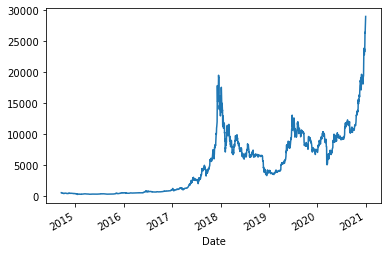

In [10]:

btc_df['Open'].plot()
resolution_value = 1200
plt.savefig("myImage.png", format="png", dpi=resolution_value)


<Figure size 432x288 with 0 Axes>

In [4]:
btc_df['delta_pct'] = (btc_df['Close'] - btc_df['Open'])/btc_df['Open']

In [ ]:
def rolling_window(a, window):
    """
        Takes np.array 'a' and size 'window' as parameters
        Outputs an np.array with all the ordered sequences of values of 'a' of size 'window'
        e.g. Input: ( np.array([1, 2, 3, 4, 5, 6]), 4 )
             Output: 
                     array([[1, 2, 3, 4],
                           [2, 3, 4, 5],
                           [3, 4, 5, 6]])
    """
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)




In [ ]:
    
btc_df['going_up'] = btc_df['delta_pct'].apply(lambda d: 1 if d>0.00001 else 0).to_numpy()

In [ ]:
element=btc_df['going_up'].to_numpy()

In [ ]:
WINDOW_SIZE=15

In [ ]:
training_data = rolling_window(element, WINDOW_SIZE)

In [ ]:
training_data

In [ ]:
pd.DataFrame(training_data).to_csv("training_data.csv", index=False)



In [ ]:
Y=training_data[:,-1]

In [ ]:
X=training_data[:,:-1]

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4284, stratify=Y)


In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import mlflow
mlflow.sklearn.autolog()

In [ ]:
lr = LogisticRegression()
    lr.fit(X,Y)
    score = lr.score(X, y)
    print("Score: %s" % score)
    mlflow.log_metric("score", score)
    mlflow.sklearn.log_model(lr, "model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
